<a href="https://colab.research.google.com/github/doc-city/diveintocode-ml/blob/main/going_down_mt_fuji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
csv_path = "/content/mtfuji_data.csv" 
np.set_printoptions(suppress=True) 
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji.shape)
print(fuji[130:140])

(300, 5)
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


PROBLEM 1  Visualization of data

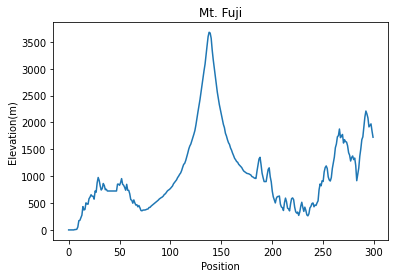

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Mt. Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation(m)")
plt.plot(fuji[:,0], fuji[:,3])
plt.show()

PROBLEM 2 Create a function to calculate the slope of a point

In [7]:
def calculate_slope(point):
  change_in_elevation = fuji[:,0][point] - fuji[:,0][point-1]
  change_in_position = fuji[:,3][point] - fuji[:,3][point-1]
  slope = change_in_position/change_in_elevation
  return slope

print(calculate_slope(0))

5.77190635451505



PROBLEM 3 Create a function to calculate the destination

In [8]:
def calculate_destination(current_point,alpha,slope):
  destination_point = current_point - alpha*slope
  if (destination_point <= 0):
    return 0
  else:
    return round(destination_point)


alpha = 0.2
current_point = 50
slope = calculate_slope(current_point)
print(calculate_destination(current_point,alpha,slope))

54


PROBLEM 4 Creating a function to go down the mountain

In [9]:
def calculate_going_down(current_position_1,alpha_1):
  slope_1 = calculate_slope(current_position_1)
  positions = [current_position_1]
  for counter in range(fuji.size):
      current_position_1 = int(calculate_destination(current_position_1,alpha_1,slope_1))
      if(positions[-1] == current_position_1):
         break
      else:
        positions.append(current_position_1)
  return positions

alpha_2 = 0.2
print(calculate_going_down(136,alpha_2))
  

[136, 102, 68, 34, 0]


PROBLEM 5 Visualization of the descent process

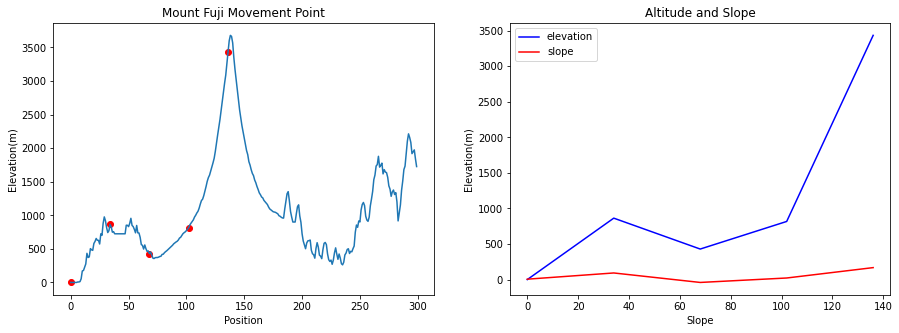

In [10]:
positions_array = calculate_going_down(136,alpha_2)
figure = plt.figure(figsize=(15,5))
fig1 = figure.add_subplot(1,2,1)

fig1.set_title("Mount Fuji Movement Point")
fig1.set_xlabel("Position")
fig1.set_ylabel("Elevation(m)")
fig1.plot(fuji[:,0],fuji[:,3])
fig1.scatter(positions_array,[fuji[position_2, 3] for position_2 in positions_array],c="red")
# plt.show()

fig2 = figure.add_subplot(1,2,2)

fig2.set_title("Altitude and Slope")
fig2.set_xlabel("Slope")
fig2.set_ylabel("Elevation(m)")
fig2.plot(positions_array,[fuji[position_2, 3] for position_2 in positions_array],c="blue",label="elevation")
fig2.plot(positions_array,[calculate_slope(position_2) for position_2 in positions_array],c="red",label="slope")
fig2.legend()
plt.show()


PROBLEM 6 Change of initial value

<Figure size 1080x360 with 0 Axes>

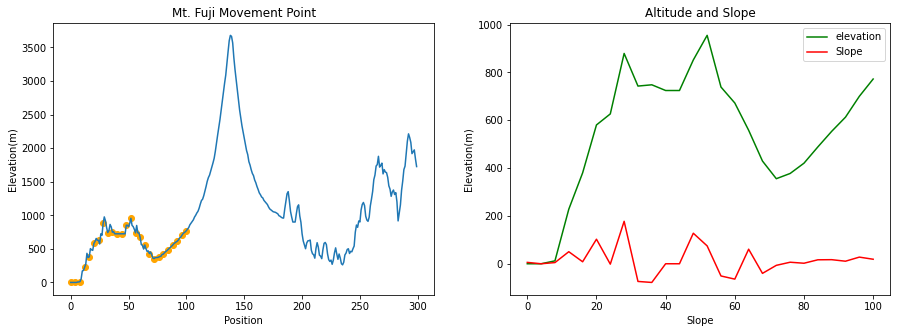

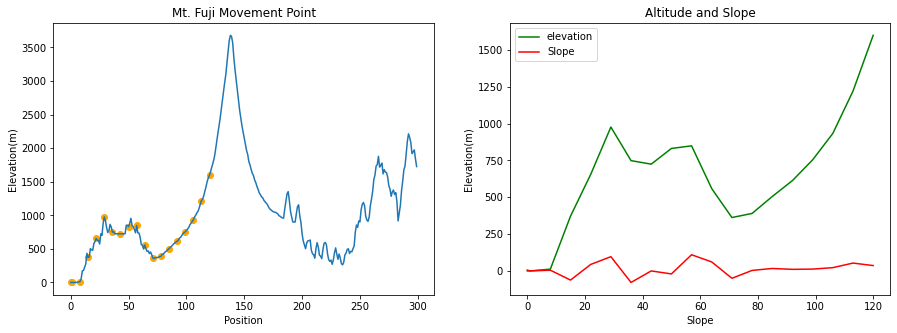

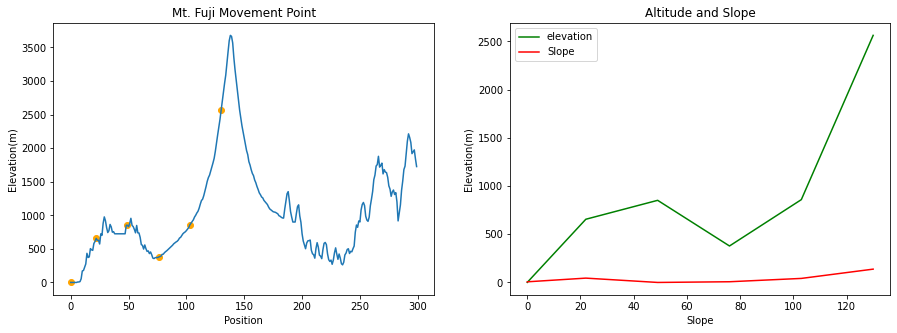

In [11]:
def display_graph_on_given_points(points):
  figure = plt.figure(figsize=(15,5))
  alpha_3 = 0.2
  for point_5 in range(points.size):
    positions_array_1 = calculate_going_down(points[point_5],alpha_3)
    figure = plt.figure(figsize=(15,5))
    fig1 = figure.add_subplot(1,2,1)

    fig1.set_title("Mt. Fuji Movement Point")
    fig1.set_xlabel("Position")
    fig1.set_ylabel("Elevation(m)")
    fig1.plot(fuji[:,0],fuji[:,3])
    fig1.scatter(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="orange")



    fig2 = figure.add_subplot(1,2,2)
    fig2.set_title("Altitude and Slope")
    fig2.set_xlabel("Slope")
    fig2.set_ylabel("Elevation(m)")
    fig2.plot(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="green",label="elevation")
    fig2.plot(positions_array_1,[calculate_slope(position_2) for position_2 in positions_array_1],c="red",label="Slope")
    fig2.legend()
    plt.show()


  
points = np.array([100,120,130])
display_graph_on_given_points(points)

PROBLEM 7 (Advance problem) Change hyperparameters

<Figure size 1080x360 with 0 Axes>

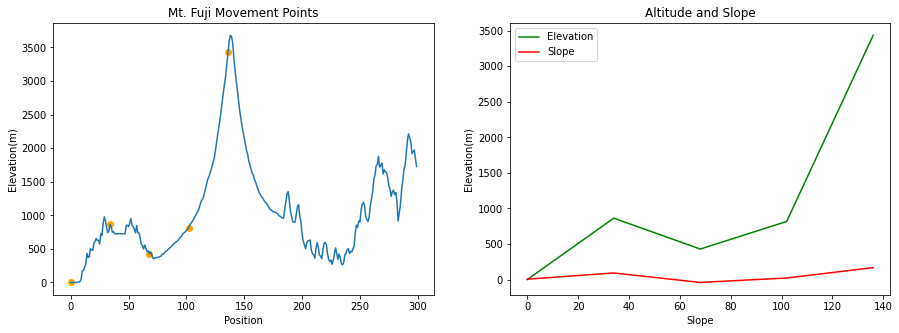

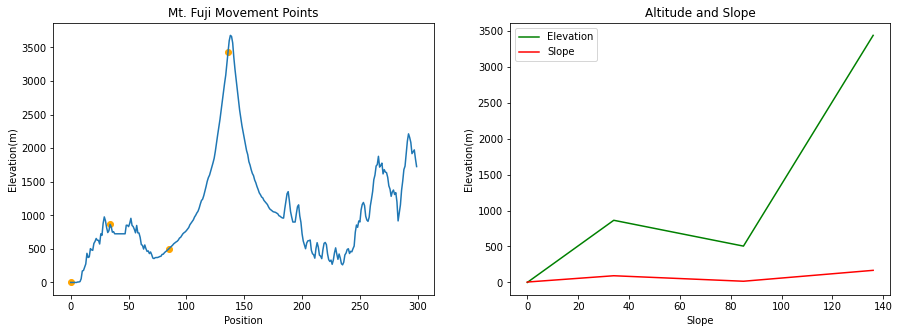

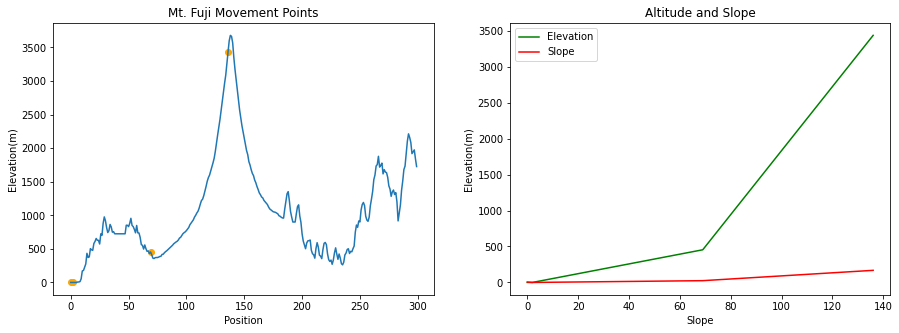

In [13]:
def display_graph_on_given_alpha_points(alphas):
  figure = plt.figure(figsize=(15,5))

  for point_6 in range(alphas.size):
    positions_array_1 = calculate_going_down(136,alphas[point_6])
    
    figure = plt.figure(figsize=(15,5))

    fig1 = figure.add_subplot(1,2,1)

    fig1.set_title("Mt. Fuji Movement Points")
    fig1.set_xlabel("Position")
    fig1.set_ylabel("Elevation(m)")
    fig1.plot(fuji[:,0],fuji[:,3])
    fig1.scatter(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="orange")



    fig2 = figure.add_subplot(1,2,2)


    fig2.set_title("Altitude and Slope")
    fig2.set_xlabel("Slope")
    fig2.set_ylabel("Elevation(m)")
    fig2.plot(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="green",label="Elevation")
    fig2.plot(positions_array_1,[calculate_slope(position_2) for position_2 in positions_array_1],c="red",label="Slope")
    fig2.legend()
    plt.show()
    
alphas_1 = np.array([0.2,0.3,0.4])
display_graph_on_given_alpha_points(alphas_1)